## WEEK 01

# **Credit Score Classification Model Development**

### **`Aim`** :The aim of this internship project is to create a predictive model that categorizes customers into three creditworthiness levels: Good, Standard, and Poor.


Importing neceesary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Loading the data set

In [6]:
data=pd.read_csv('/content/credit.csv')

## **EDA**

In [7]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [8]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [9]:
data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


**Dataset description**

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments

Amount_invested_monthly: Represents the monthly amount invested by the customer

Payment_Behaviour: Represents the payment behavior of the customer

Monthly_Balance: Represents the monthly balance amount of the customer

Credit_Score: Represents the credit score of the customer (Poor, Standard, Good)

In [10]:
data.shape

(100000, 28)

In [11]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
#DISPLAY THE FULL SUMMARY OF THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [13]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [14]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### its clear that data doesn't contain any missing value

In [15]:
#STATISTICAL SUMMARY OF THE GIVEN DATASET.
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [16]:
data.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

### Checking whether duplicate values present or not in the data set

In [17]:
data.duplicated().sum()

0

In [18]:
data.duplicated().value_counts()

False    100000
Name: count, dtype: int64

### No duplicate values present

In [19]:
data.isnull().sum().reset_index().rename(columns={'index':'feature_names ',0:'null_count'})

,feature_names,null_count
0,ID,0
1,Customer_ID,0
2,Month,0
3,Name,0
4,Age,0
5,SSN,0
6,Occupation,0
7,Annual_Income,0
8,Monthly_Inhand_Salary,0
9,Num_Bank_Accounts,0


## Checking unique values

In [20]:
data['Age'].unique()


array([23., 28., 34., 54., 55., 21., 31., 33., 30., 24., 44., 45., 40.,
       41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19., 48., 38.,
       43., 22., 16., 18., 15., 27., 25., 14., 17., 47., 53., 56., 29.,
       49., 51., 50., 52.])

In [21]:
data['Age'].value_counts()

Age
38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    2953
25.0    2952
27.0    2951
35.0    2940
39.0    2927
34.0    2922
44.0    2902
22.0    2890
19.0    2875
41.0    2865
20.0    2833
37.0    2832
29.0    2823
43.0    2809
30.0    2807
21.0    2792
24.0    2789
23.0    2719
45.0    2712
40.0    2695
42.0    2643
33.0    2623
18.0    2427
46.0    1670
15.0    1615
17.0    1551
16.0    1505
49.0    1419
48.0    1416
55.0    1395
53.0    1394
52.0    1388
54.0    1342
51.0    1332
50.0    1305
47.0    1265
14.0    1197
56.0     379
Name: count, dtype: int64

In [22]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [23]:
data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [24]:
data['Monthly_Inhand_Salary'].unique()

array([ 1824.84333333,  3037.98666667, 12187.22      , ...,
        3097.00833333,  1929.90666667,  3359.41583333])

In [25]:
data['Monthly_Inhand_Salary'].value_counts()

Monthly_Inhand_Salary
6769.130000     16
6639.560000     16
2295.058333     16
6082.187500     16
6358.956667     16
                ..
1056.522397      1
1573.927963      1
4722.318333      1
611.734883       1
10823.060062     1
Name: count, Length: 13241, dtype: int64

In [26]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [27]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [28]:
data['Num_Bank_Accounts'].unique()

array([ 3.,  2.,  1.,  7.,  4.,  0.,  8.,  5.,  6.,  9., 10., 11.])

In [29]:
data['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6.0     13175
7.0     12999
8.0     12940
4.0     12343
5.0     12298
3.0     12107
9.0      5503
10.0     5329
1.0      4540
0.0      4417
2.0      4340
11.0        9
Name: count, dtype: int64

In [30]:
data['Num_Credit_Card'].unique()

array([ 4.,  5.,  1.,  7.,  6.,  8.,  3.,  9.,  2., 10., 11.,  0.])

In [31]:
data['Num_Credit_Card'].value_counts()

Num_Credit_Card
5.0     18903
7.0     17024
6.0     16932
4.0     14362
3.0     13560
8.0      5073
10.0     4962
9.0      4753
2.0      2196
1.0      2185
11.0       36
0.0        14
Name: count, dtype: int64

In [32]:
data['Num_of_Loan'].unique()

array([4., 1., 3., 0., 2., 7., 5., 6., 8., 9.])

In [33]:
data['Num_of_Loan'].value_counts()

Num_of_Loan
3.0    15752
2.0    15712
4.0    15456
0.0    11408
1.0    11128
6.0     8144
7.0     7680
5.0     7528
9.0     3856
8.0     3336
Name: count, dtype: int64

In [34]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [35]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [36]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [37]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [38]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [39]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

In [40]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [41]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [42]:
data['Occupation'].nunique()

15

In [43]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [44]:
data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [45]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

# **DATA VISUALIZATION**

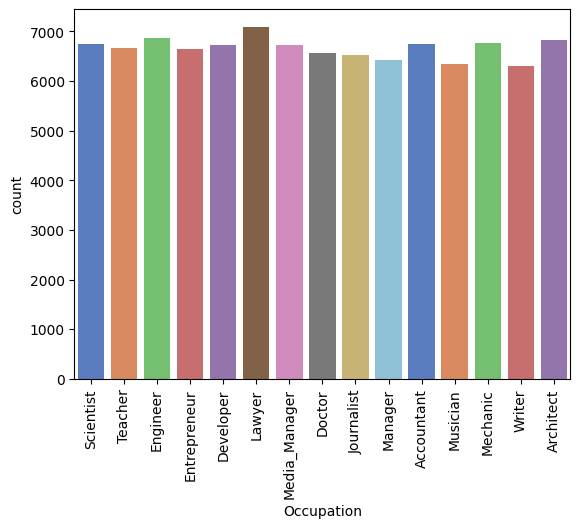

In [46]:
sns.countplot(x = data['Occupation'],palette = "muted")
plt.xticks(rotation = 90)
plt.show()
plt.figsize=(20,10)

([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Poor')])

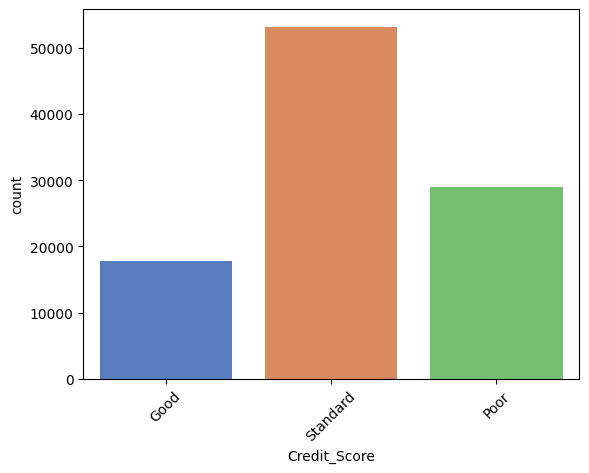

In [47]:
sns.countplot(x = data['Credit_Score'],palette = "muted");
plt.xticks(rotation = 45)

([0, 1, 2], [Text(0, 0, 'No'), Text(1, 0, 'NM'), Text(2, 0, 'Yes')])

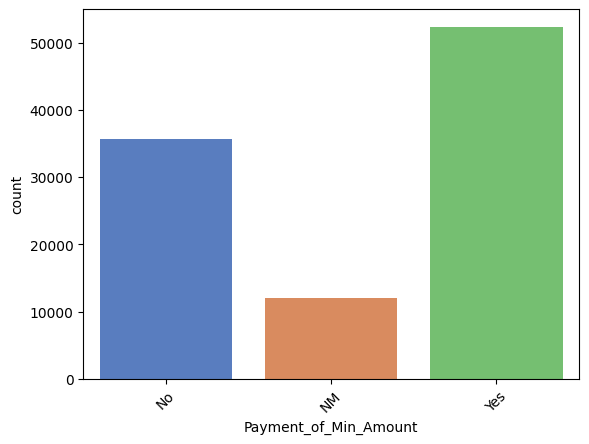

In [48]:
sns.countplot(x = data['Payment_of_Min_Amount'],palette = "muted");
plt.xticks(rotation = 45)

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'SSN'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Ax

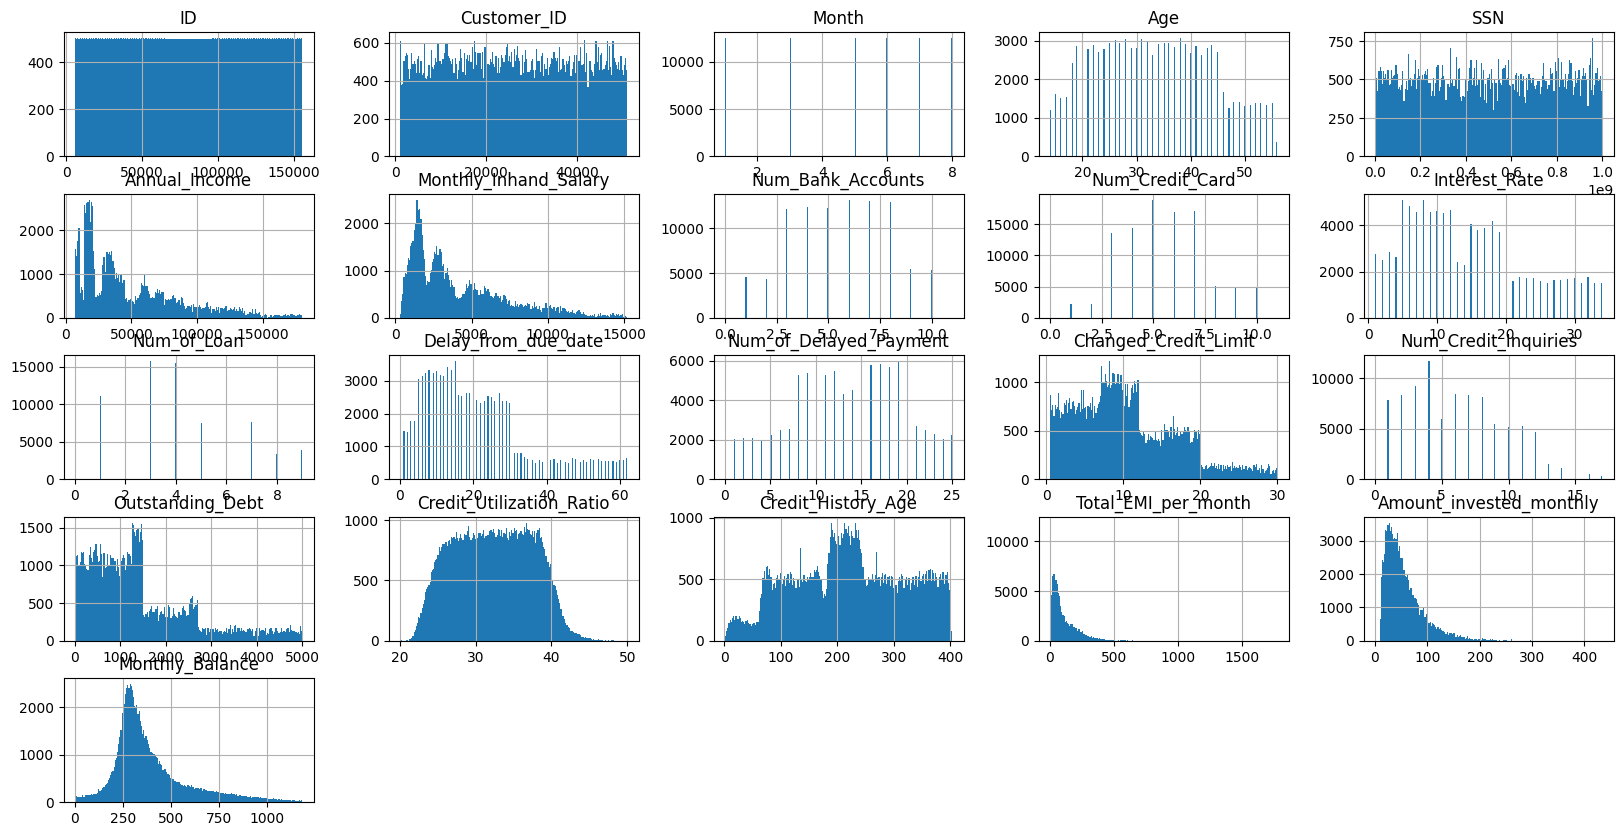

In [49]:
data.hist(bins=200,figsize=(20,10))



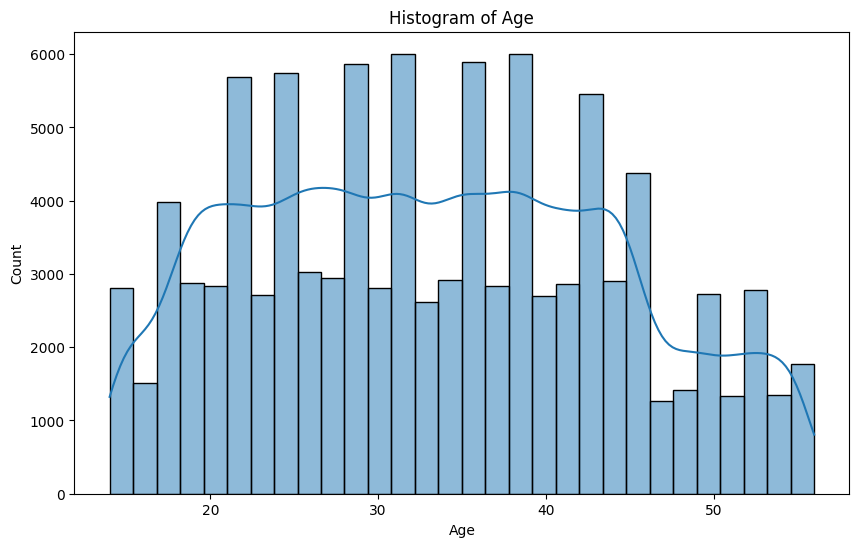

In [50]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Bad')])

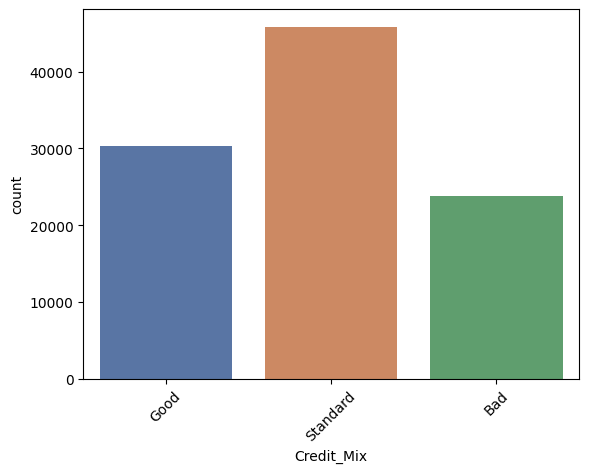

In [51]:
sns.countplot(x = data['Credit_Mix'],palette = "deep");
plt.xticks(rotation = 45)

##Count plots for categorical features

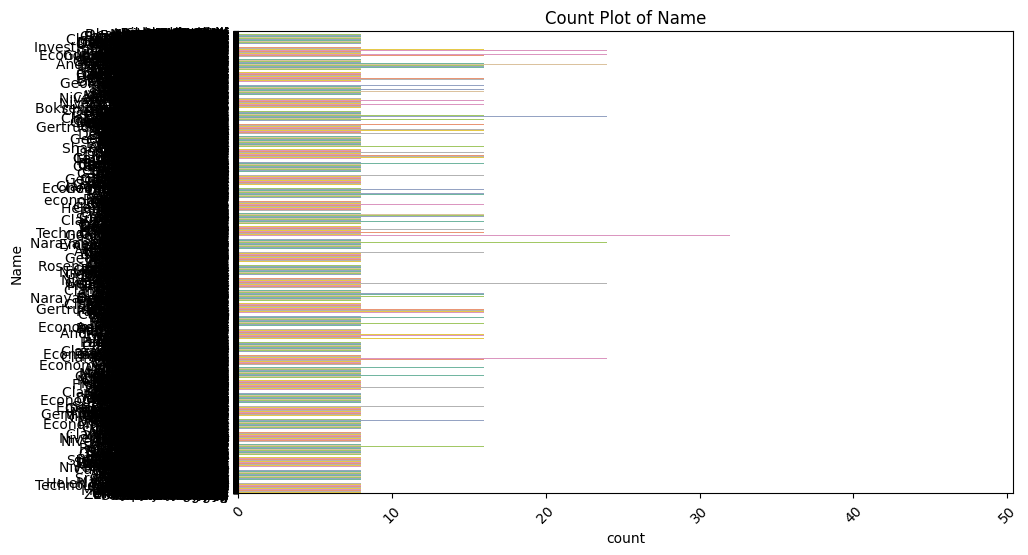

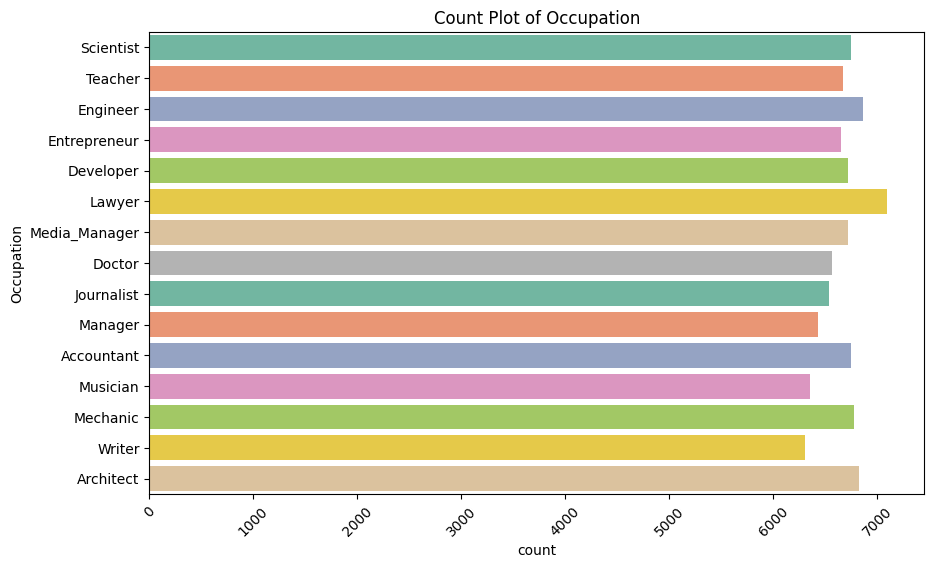

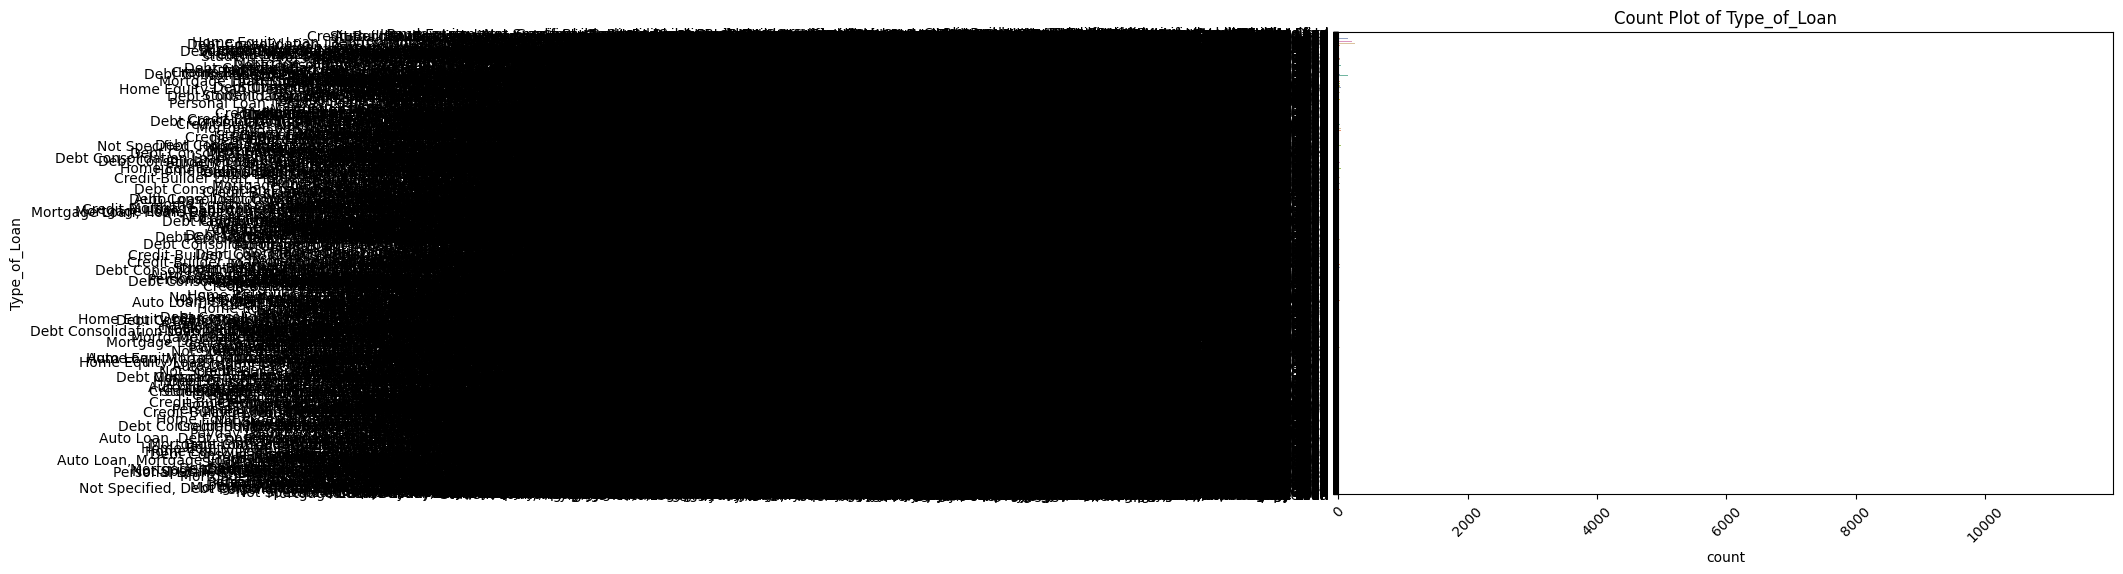

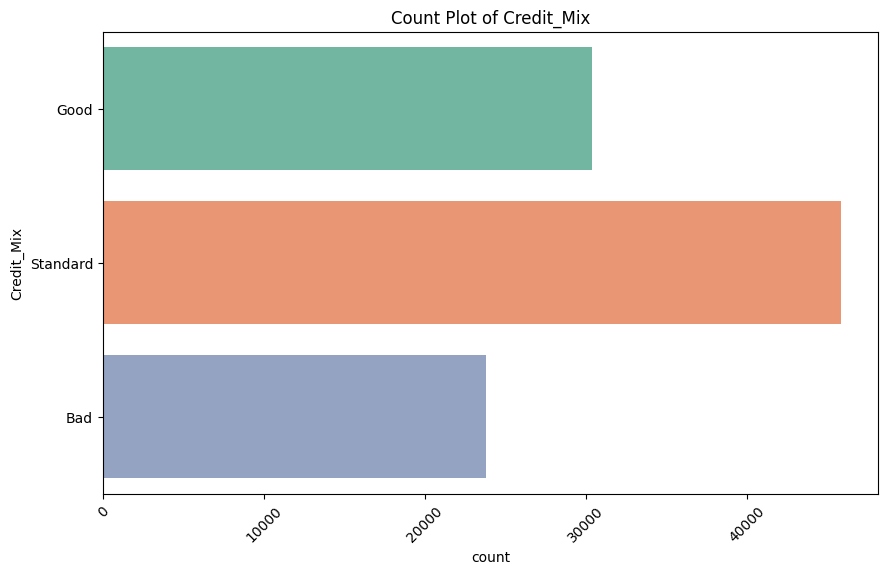

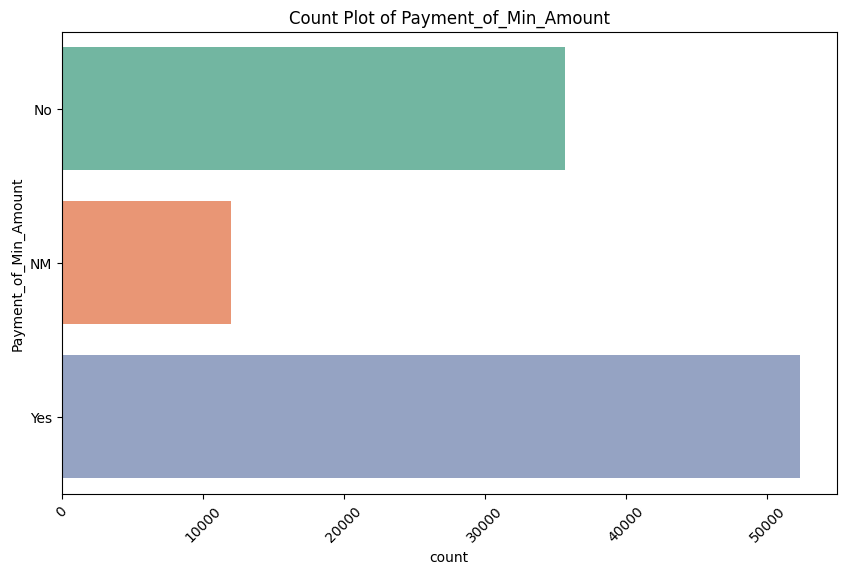

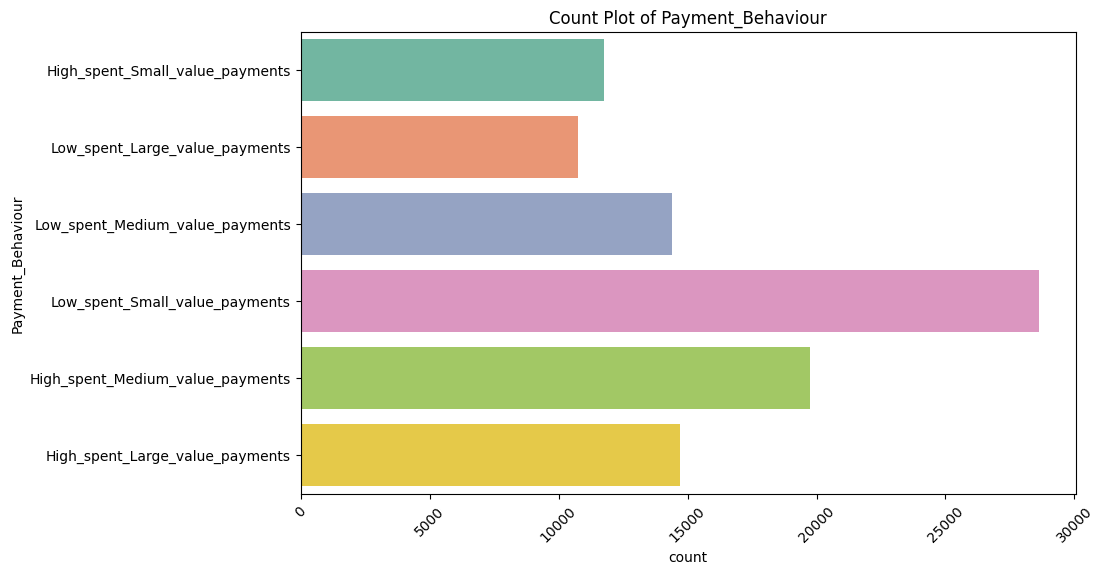

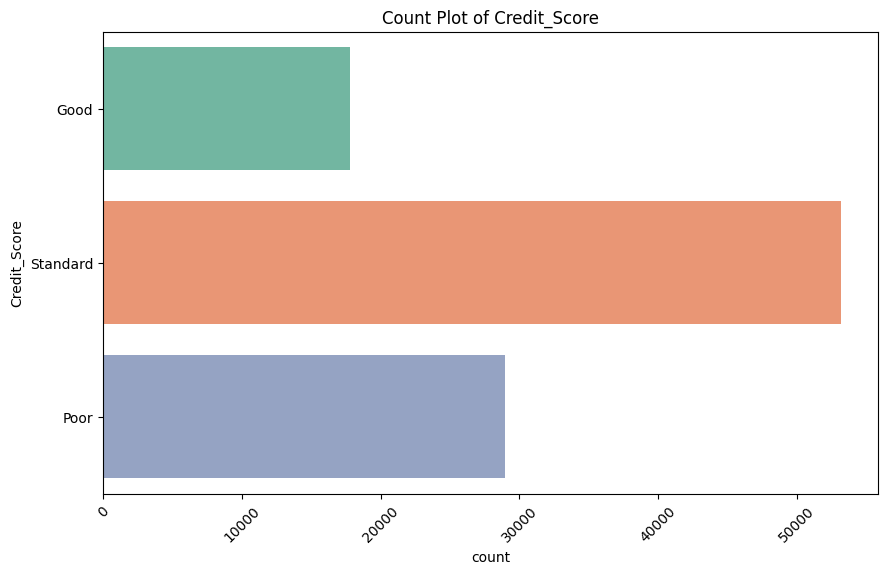

In [52]:
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column],palette='Set2')
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()

###Box plots for categorical features against the target variable 'Credit_Score'

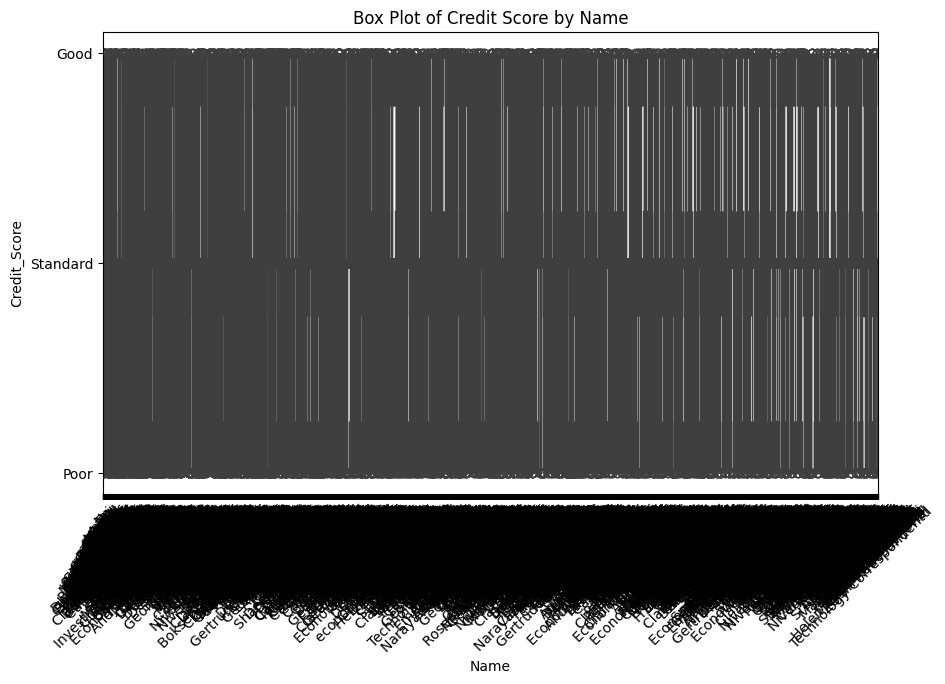

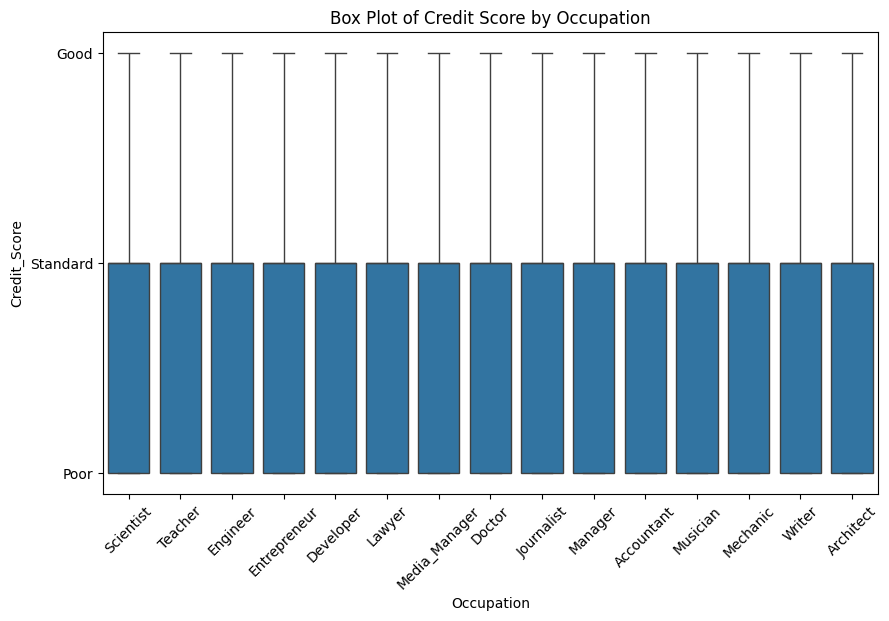

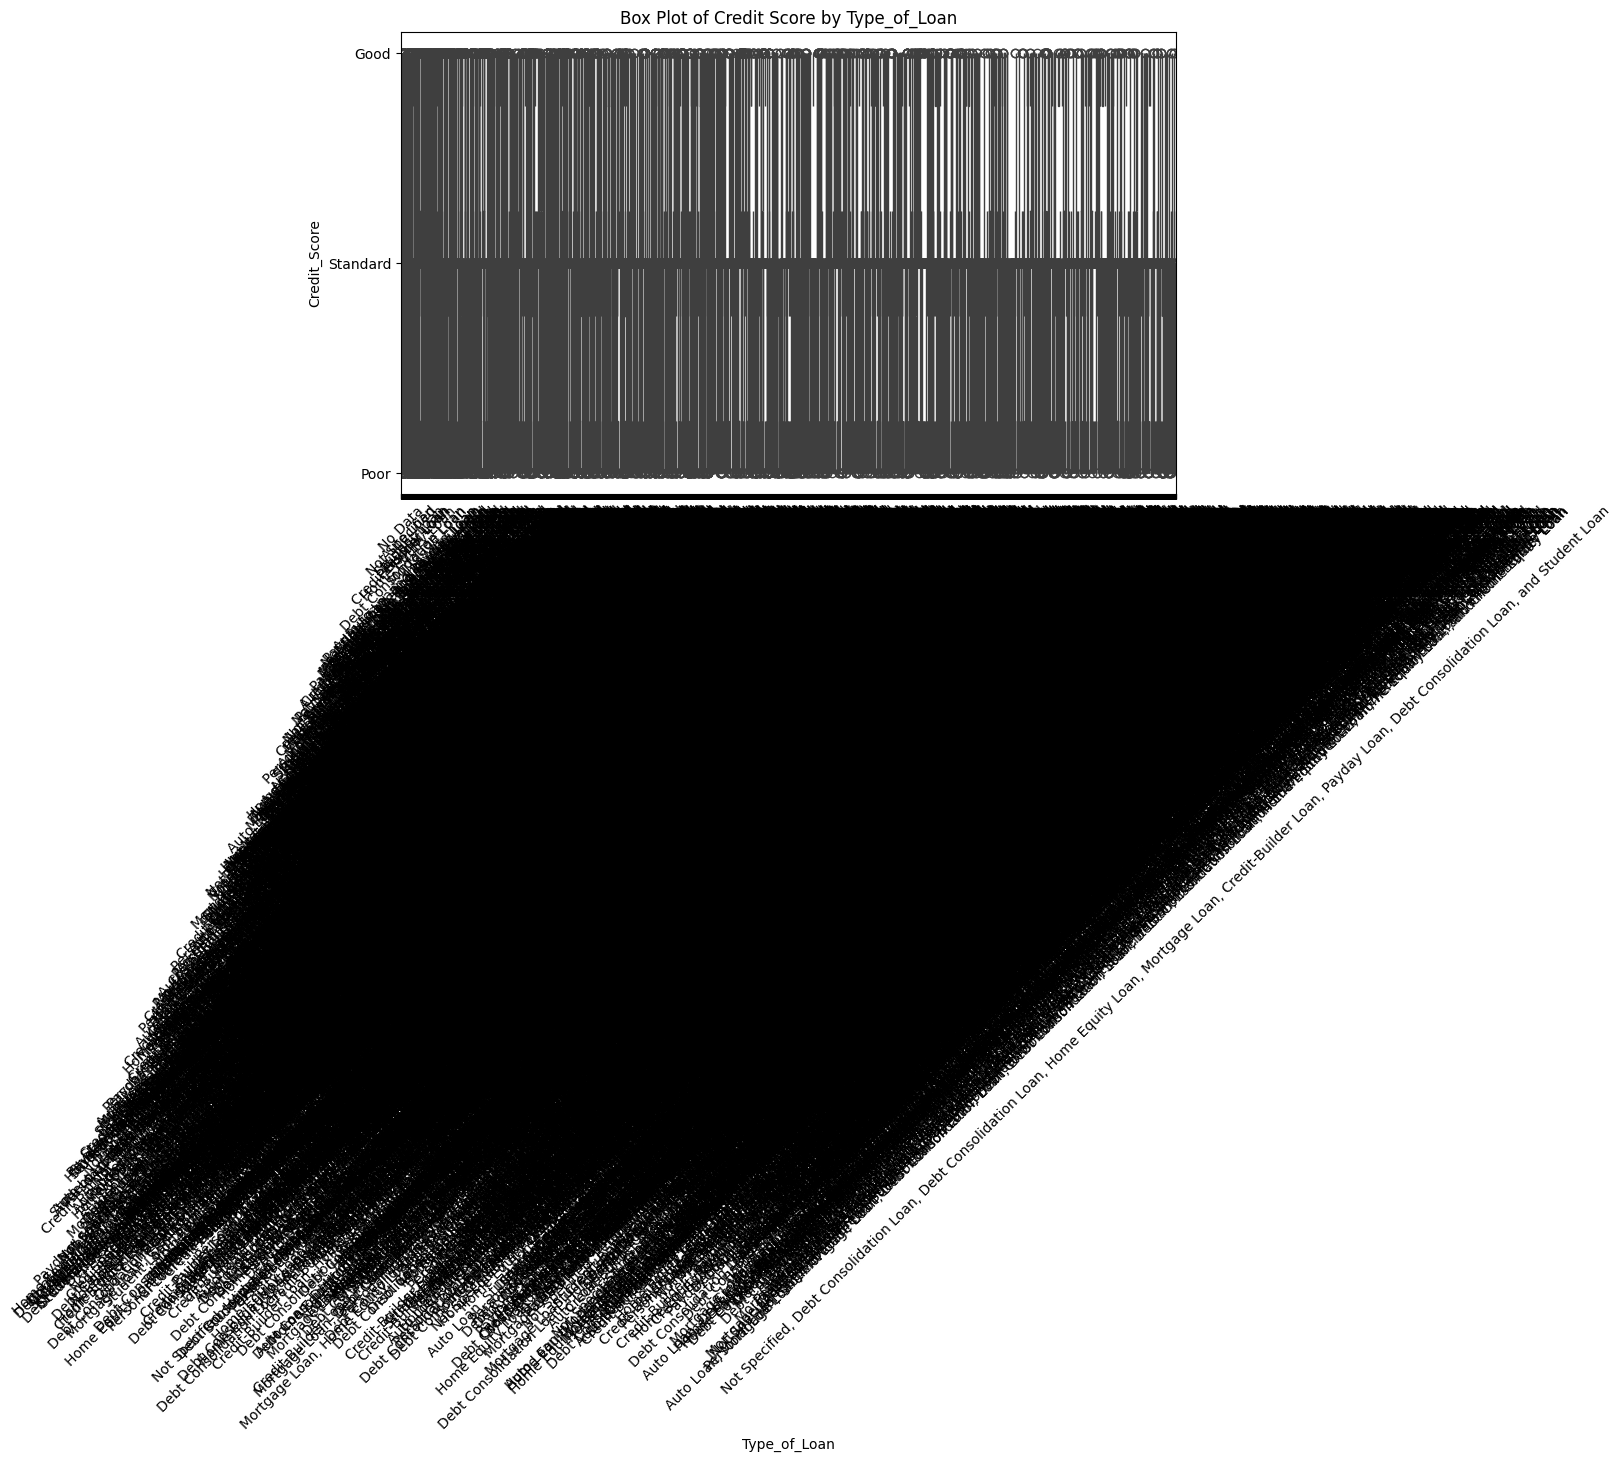

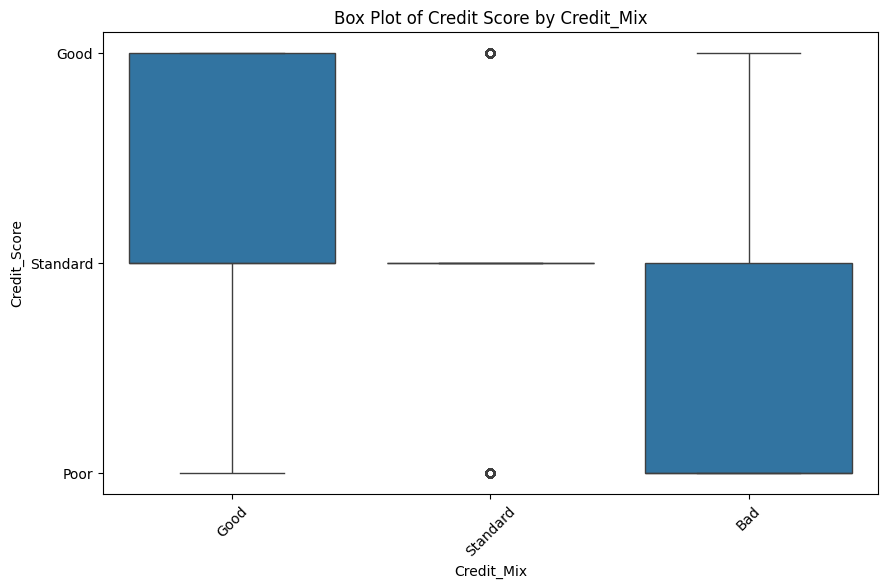

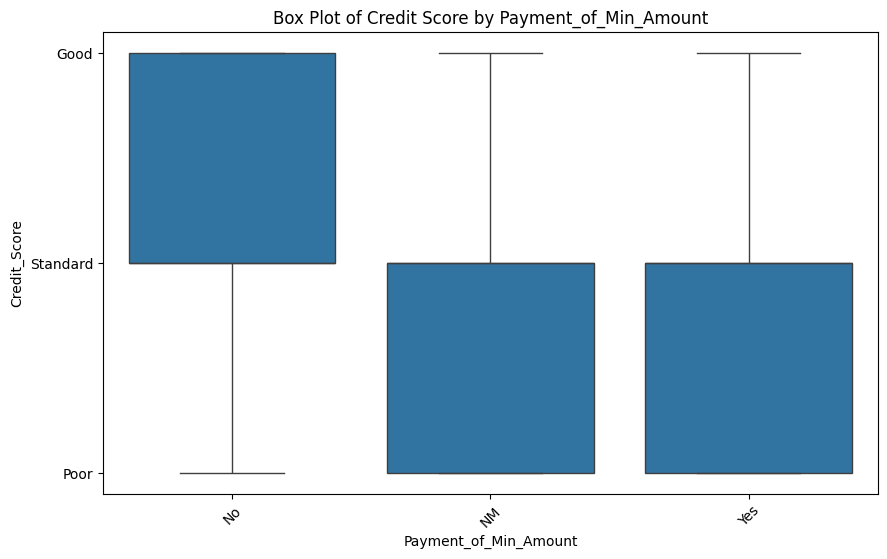

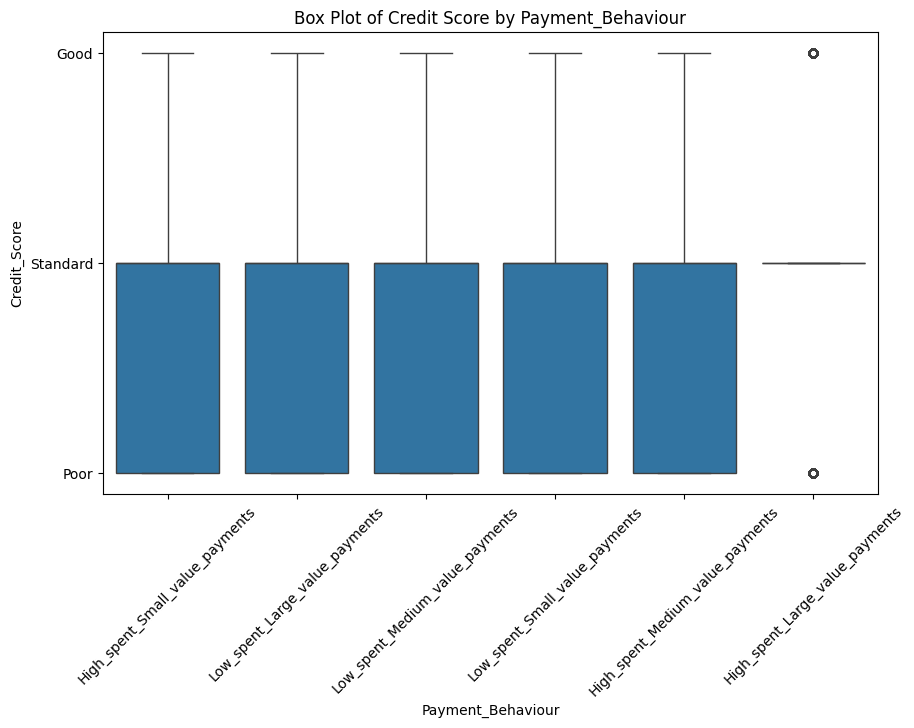

In [53]:
for column in categorical_features:
    if column != 'Credit_Score':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], y=data['Credit_Score'])
        plt.title(f"Box Plot of Credit Score by {column}")
        plt.xticks(rotation=45)
        plt.show()

In [54]:
def pie_plot(data, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        data[col].value_counts().plot(ax=ax, kind='pie', figsize=(10, 10), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

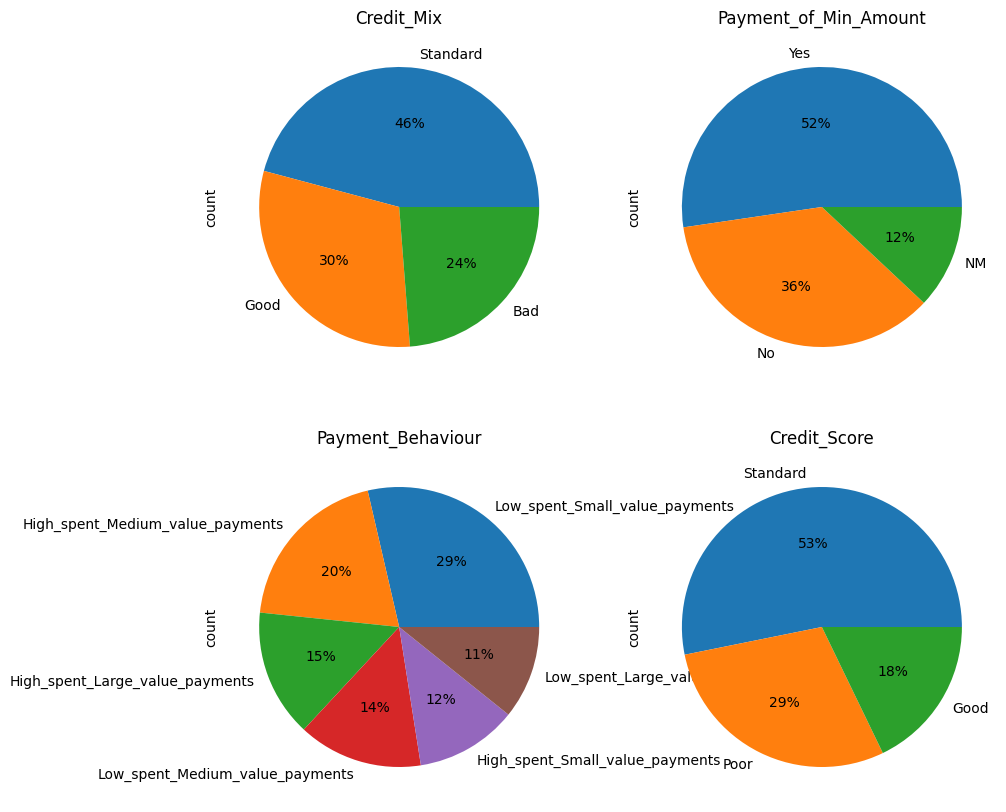

In [55]:
pie_plot(data, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],2,2)

<Axes: xlabel='Occupation', ylabel='count'>

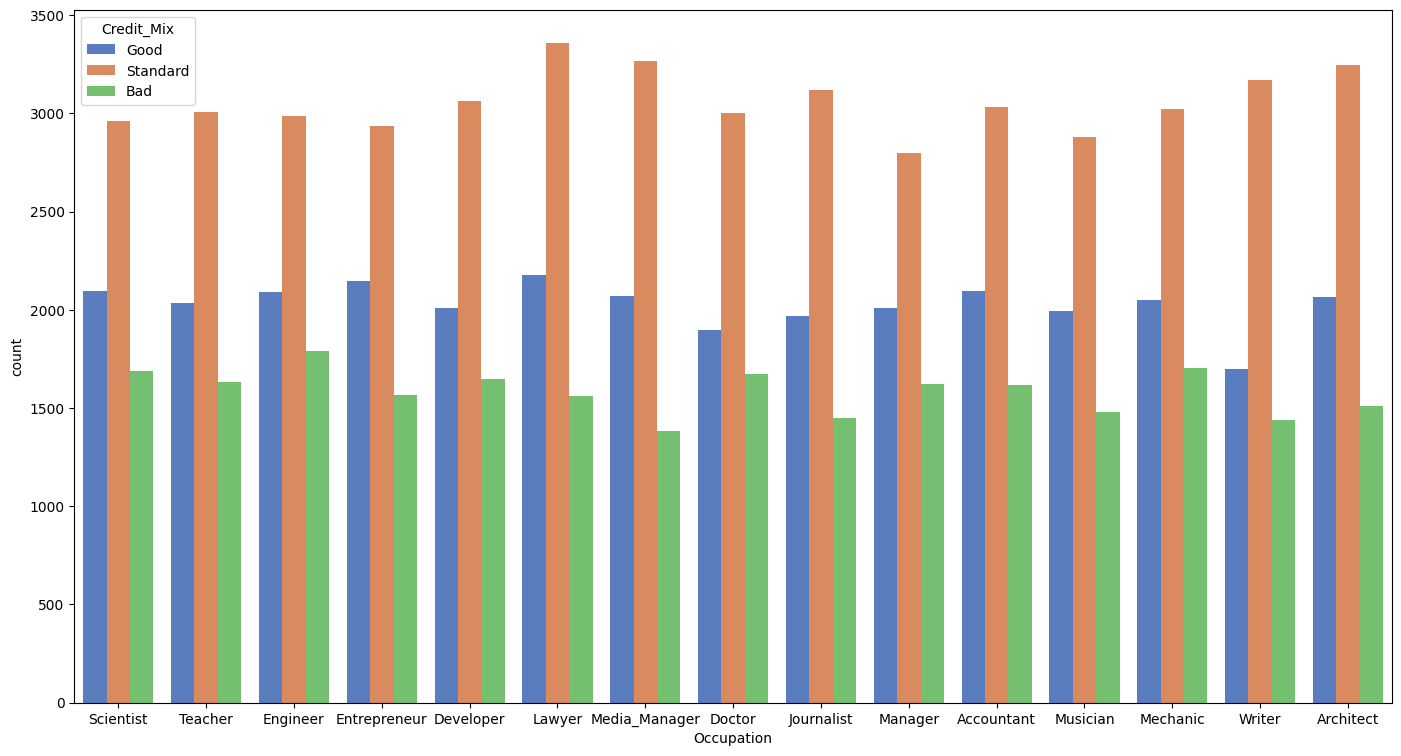

In [56]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Credit_Mix",palette="muted")

<Axes: xlabel='Occupation', ylabel='count'>

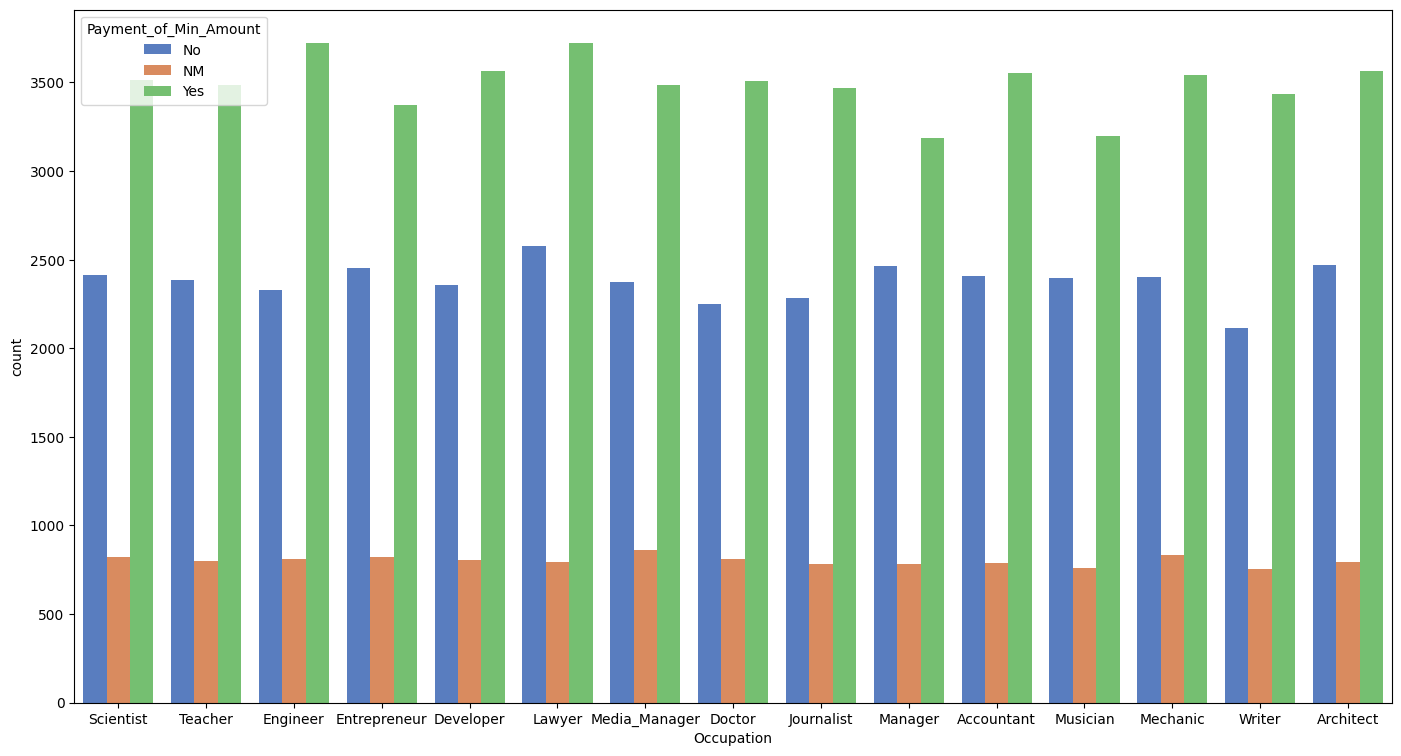

In [57]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Payment_of_Min_Amount",palette="muted")

<Axes: xlabel='Occupation', ylabel='count'>

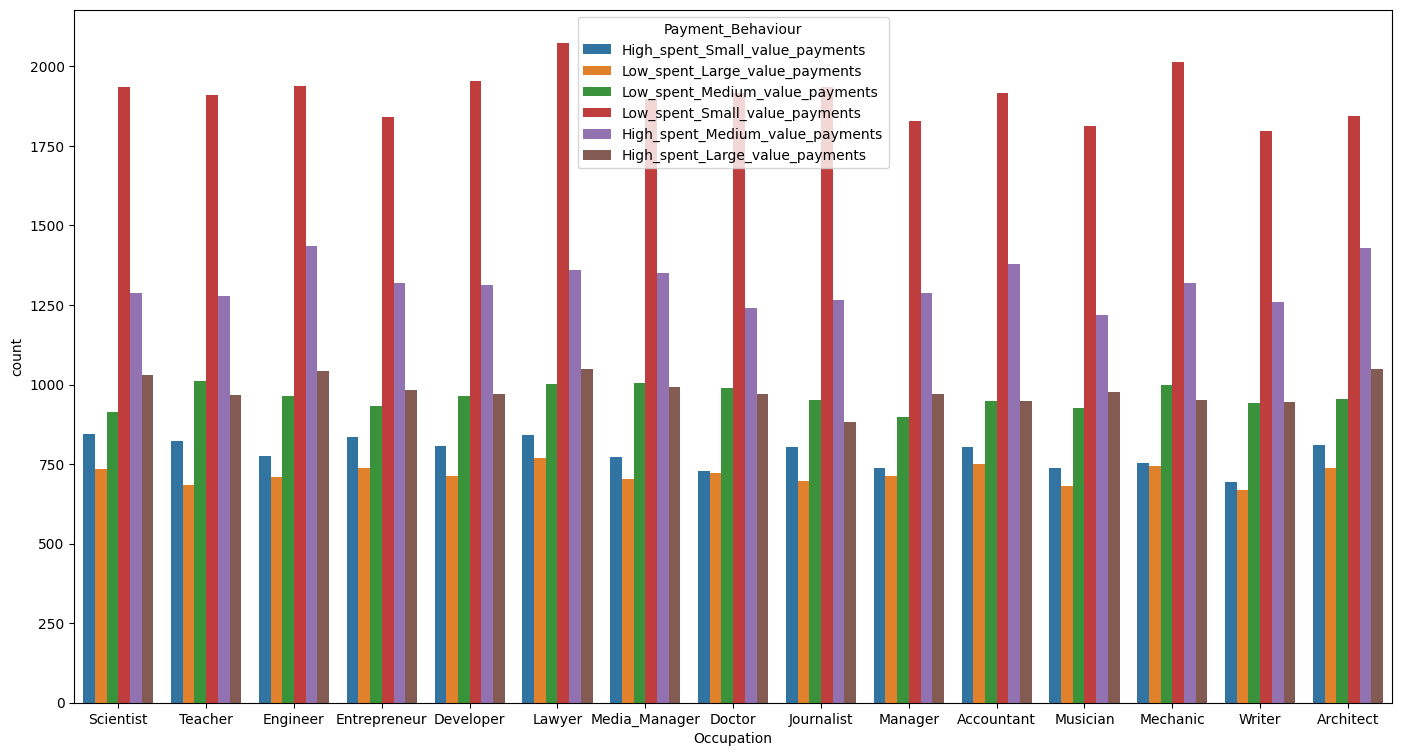

In [58]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

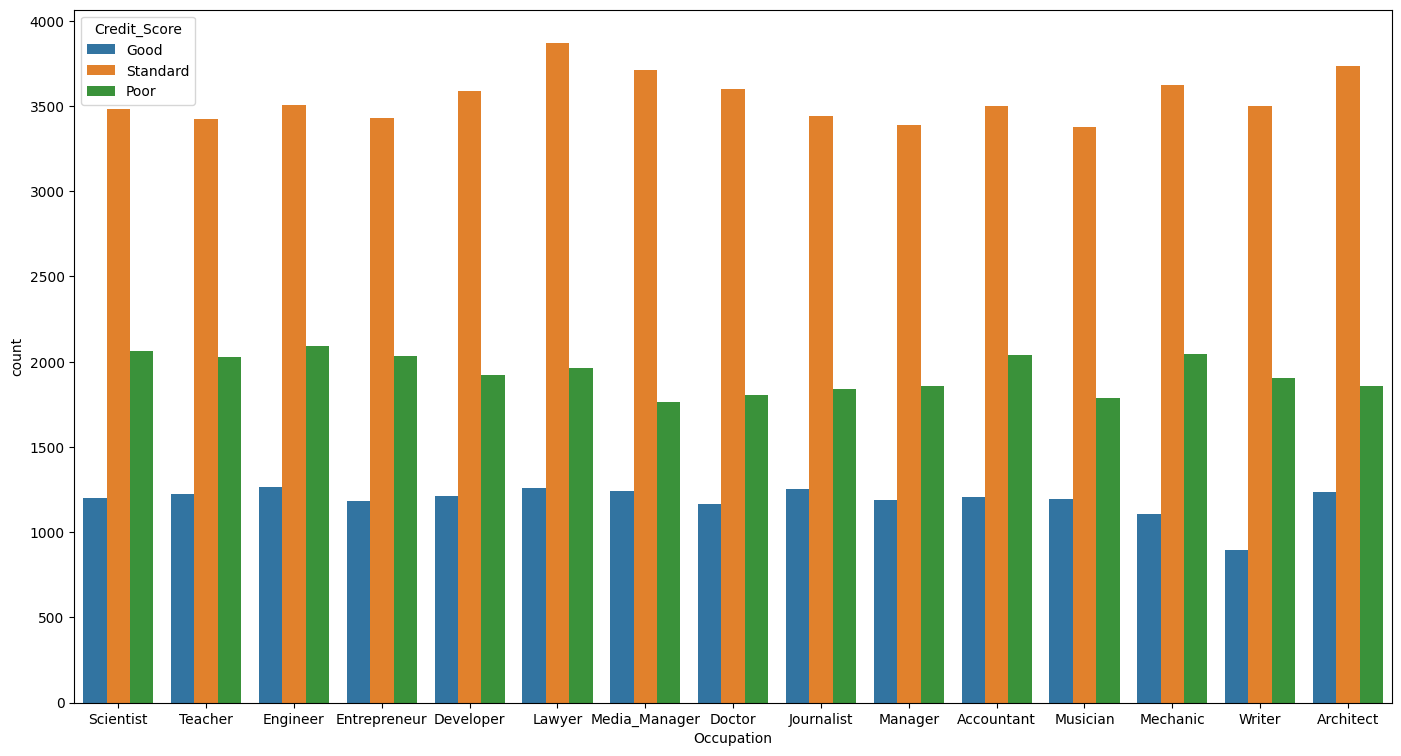

In [59]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Credit_Score")

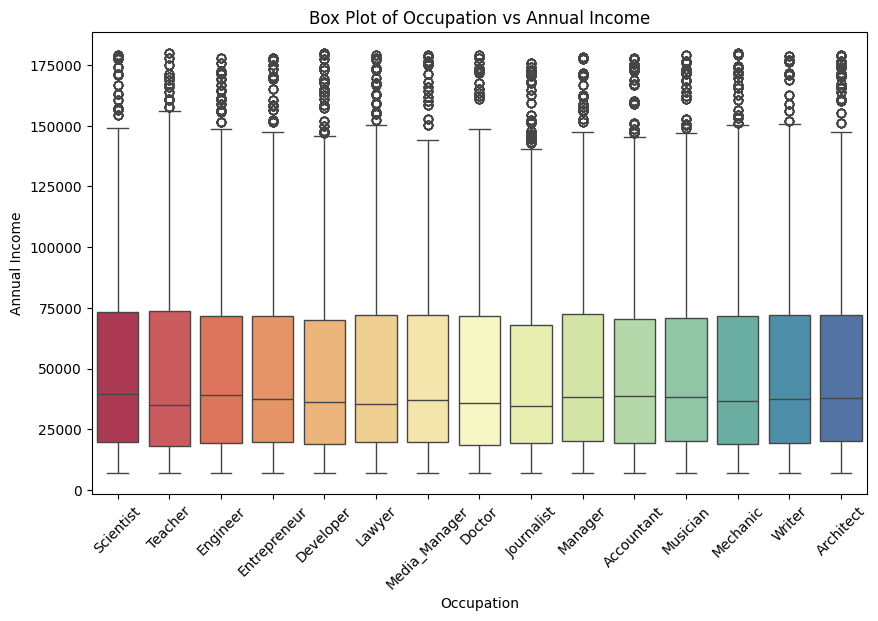

In [60]:
# Box Plot for Occupation vs Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Annual_Income', data=data,palette="Spectral")
plt.title("Box Plot of Occupation vs Annual Income")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.xticks(rotation=45)
plt.show()

In [61]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [62]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [63]:
data['Num_Credit_Card'].nunique()

12

In [64]:
data['Num_Credit_Card'].unique()

array([ 4.,  5.,  1.,  7.,  6.,  8.,  3.,  9.,  2., 10., 11.,  0.])

#### 1.ID, Name and SSN ,month,customerid ,age,monthly inhand salary are not useful,Hence we can drop these columns.                                          
#### 2.Num_Credit_Card has value as zeros,In order to get credit score one should have minimum one credict card.
#### 3. Payment_of_Min_Amount has threee unique values "Yes","NO","NM".where "NM" should be changed.

#  **Data Pre Processing**




### Removing unnecessary columns which have less impact

In [65]:
data.drop('ID',axis=1,inplace=True)
data.drop('Customer_ID',axis=1,inplace=True)
data.drop('Month',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)
data.drop('SSN',axis=1,inplace=True)
data.drop('Occupation',axis=1,inplace=True)

#### Put Credit Card owned to atleast one

In [66]:

#data['Num_Credit_Card'].replace(0,1,inplace=True)

#### Divide type of loan in to different column

In [67]:
#for i in data['Type_of_Loan'].value_counts().head(10).index[1:]:
 #   data[i] = data['Type_of_Loan'].str.contains(i).astype(str)

#data.drop('Type_of_Loan', axis=1, inplace=True)

#### Changing "NM" in Payment_of_Min_Amount' column to "NO"

In [68]:
data['Payment_of_Min_Amount'].replace("NM","No",inplace = True)

In [69]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

In [70]:
data.isnull().sum()

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### No null values present in the data set

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Type_of_Loan              100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

Here we can see different types of loan is added to columns

### Outlier detection

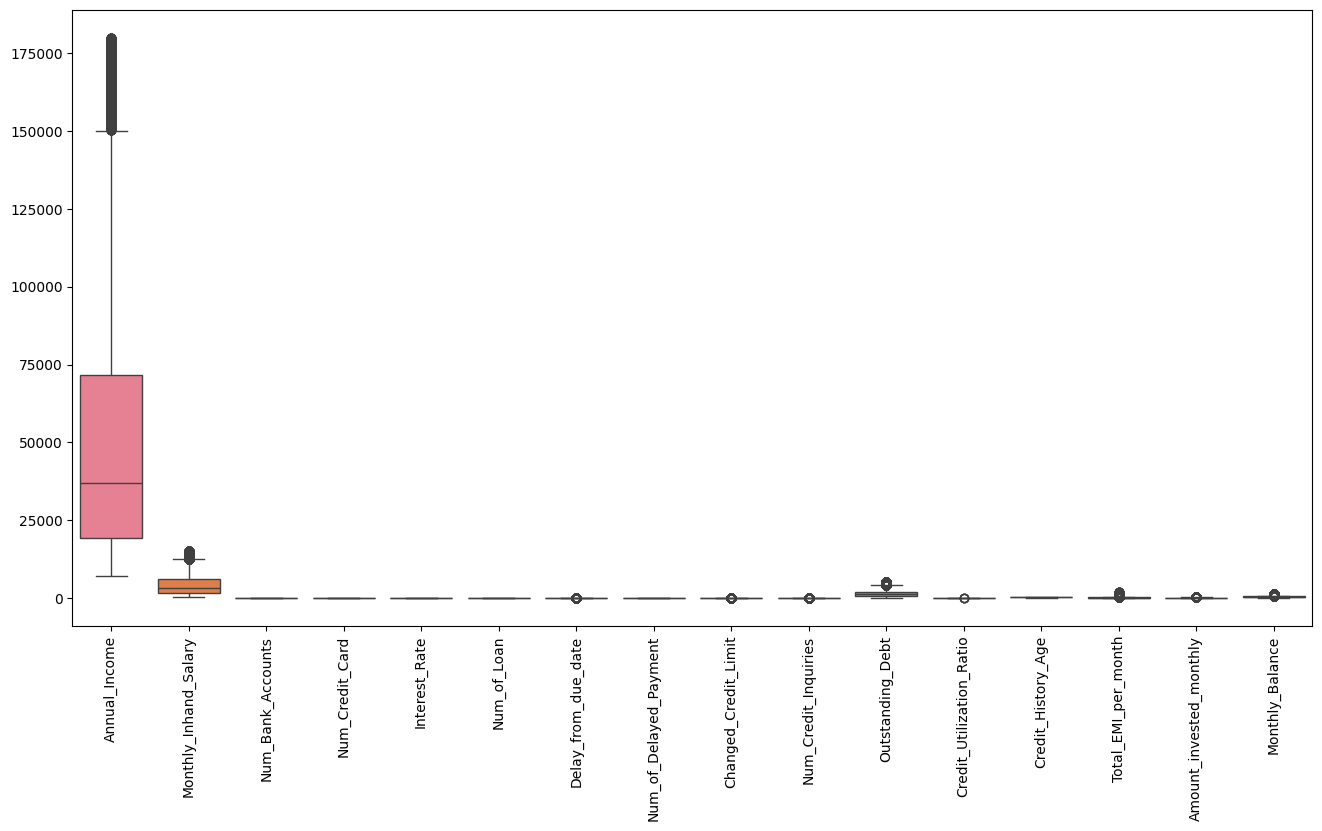

In [72]:
plt.figure(figsize=(16, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [73]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

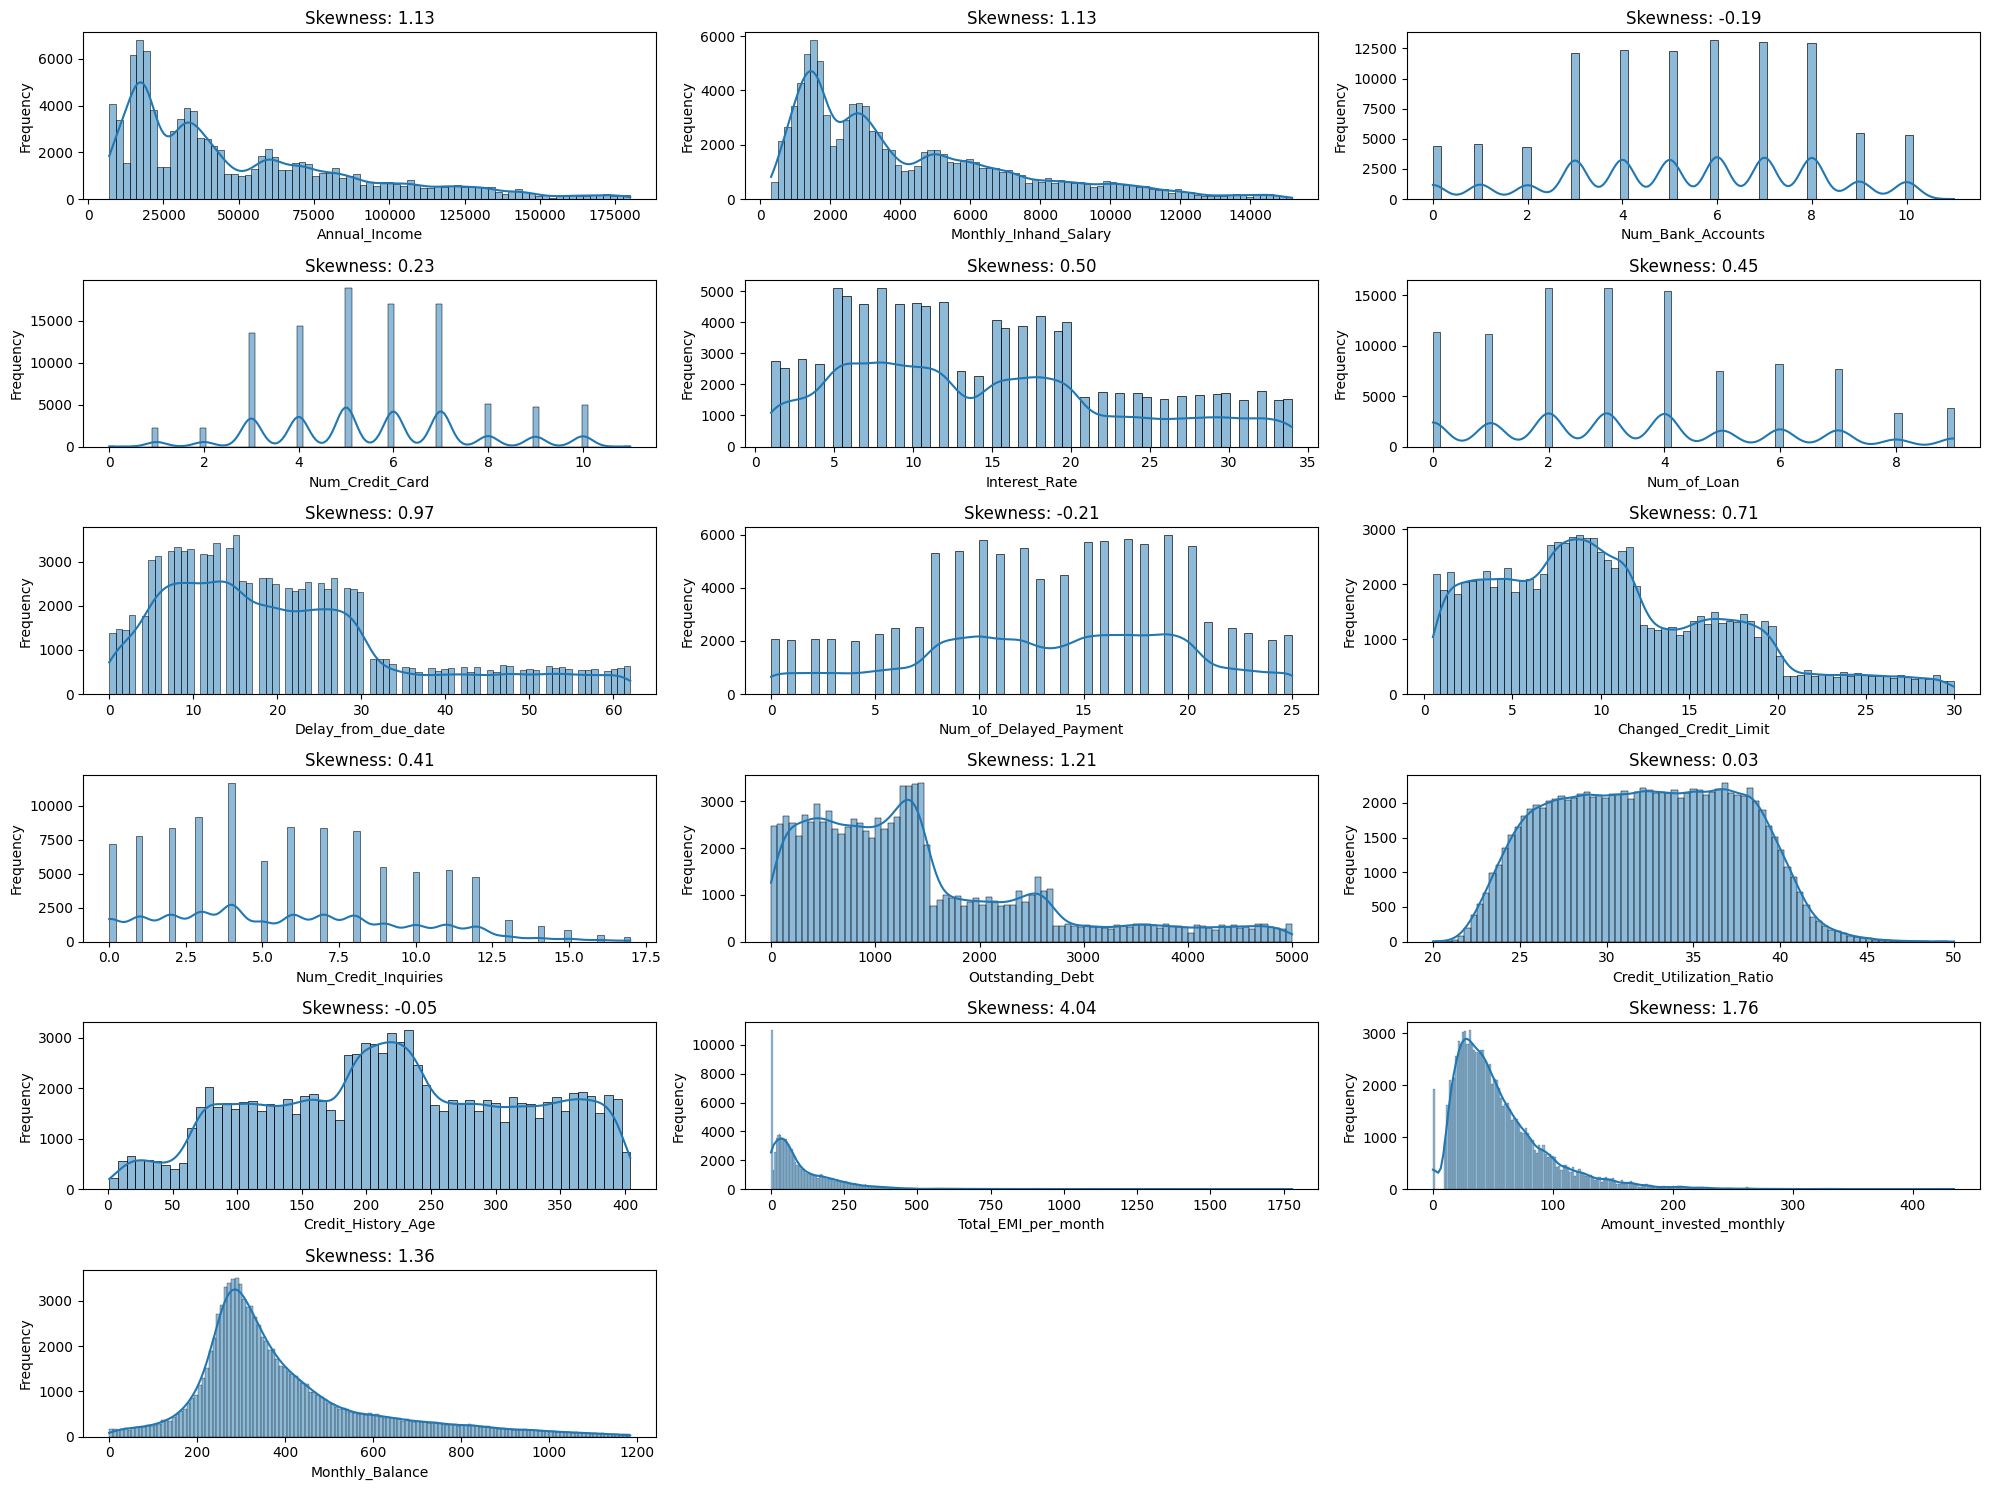

In [74]:
# PLOTTING SKEWNESS
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Skewness: {data[column].skew():.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [75]:
outlier_columnss=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [76]:
for i in outlier_columnss:
    print('Skewness of feature',i,':',data[i].skew())

Skewness of feature Annual_Income : 1.130222566741384
Skewness of feature Monthly_Inhand_Salary : 1.1286896104040092
Skewness of feature Delay_from_due_date : 0.9698402706723249
Skewness of feature Changed_Credit_Limit : 0.7083424268261724
Skewness of feature Num_Credit_Inquiries : 0.40682536214725384
Skewness of feature Outstanding_Debt : 1.2075361955699684
Skewness of feature Total_EMI_per_month : 4.041492244076896
Skewness of feature Amount_invested_monthly : 1.7610362306626115
Skewness of feature Monthly_Balance : 1.3556137797479813


Outliers are genuine, for this reason not performing IQR test.Performed log test also but no remarkable improvement

In [77]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [78]:
data.tail()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.5,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.5,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.5,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.5,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,6.0,11.5,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Type_of_Loan              100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

## **Encoding & Scaling**

In [80]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [81]:
# Separate features and target variable
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

In [82]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [83]:
# One-Hot Encoding for categorical columns except 'Credit_Score'
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(X[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

In [84]:
# Drop original categorical columns and concatenate encoded columns
X = X.drop(columns=categorical_cols)
X = pd.concat([X, encoded_categorical_df], axis=1)

In [85]:
# Scaling for numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [86]:
# Display the transformed features
X.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,"Type_of_Loan_Student Loan, and Personal Loan","Type_of_Loan_Student Loan, and Student Loan",Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.493173,0.120990,-0.464928,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.221347,-1.012183,0.120990,-0.464928,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.086253,-1.493173,-0.635503,-0.464928,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.819625,-0.744544,-0.913438,-0.741899,-1.319266,0.190946,-1.018705,-1.493173,0.120990,-0.464928,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
new_columns_out_final = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [88]:
data.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [89]:
data.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Type_of_Loan              100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

Label encoding target column

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
data['Credit_Score'] = le.fit_transform(data['Credit_Score'])

In [93]:
data.head(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,0
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,0
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,0
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,0
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,0


In [94]:
data.tail(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.5,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,1
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.5,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,1
99997,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.5,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,1
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.5,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,2
99999,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,6.0,11.5,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,1


### Categorical columns are label encoded completly

### Checking correalation

In [95]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

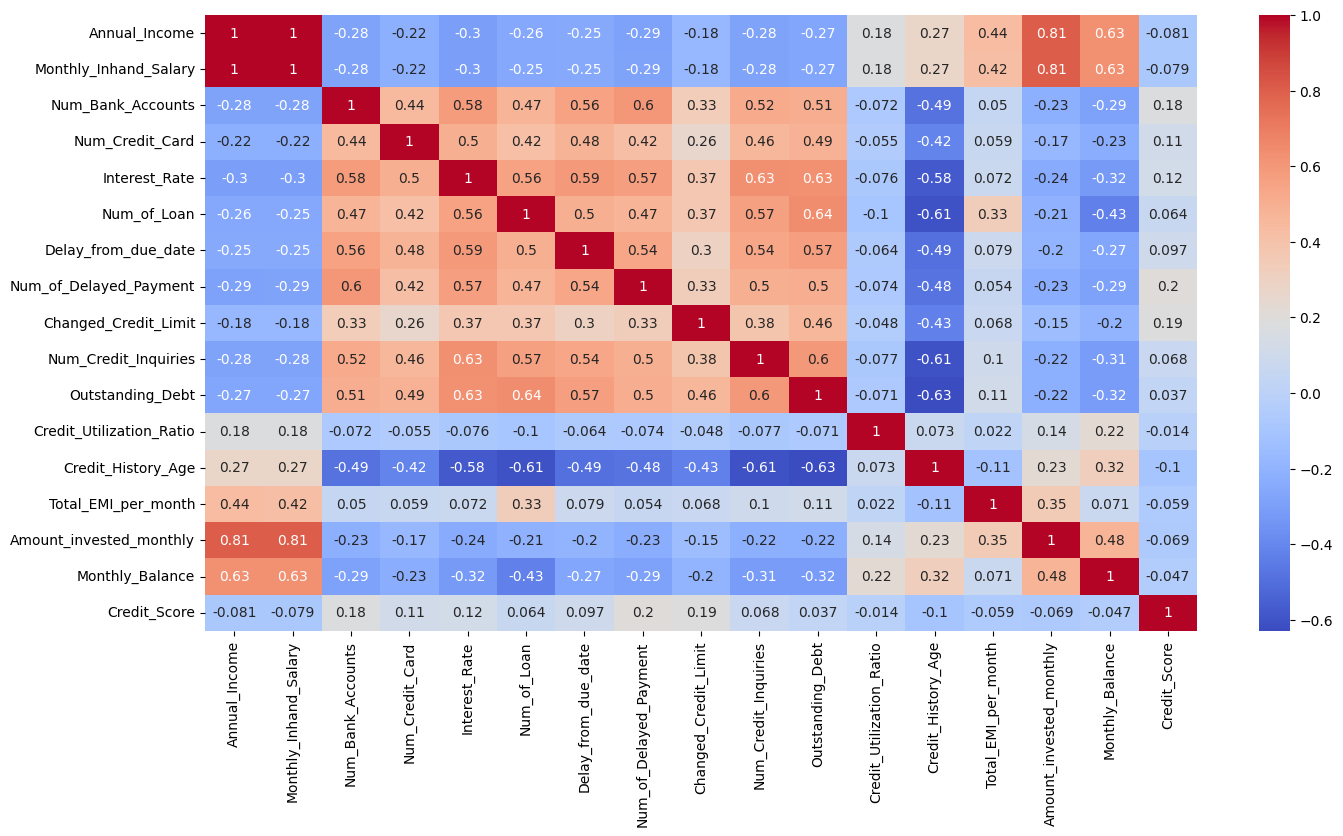

In [96]:
# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### **Its clear from the heapmap that Annual Income and Monthly Inhand Salary highly correlared**

In [97]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,0
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,0
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,0
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,0
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,0


In [98]:
# Dropping MOnthly in hand Salary
data.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

##**Train_test_split_test**

### Split the data: Create training and testing sets.For model development


In [99]:
y = data.Credit_Score
X = data.drop('Credit_Score',axis=1)

In [100]:
X.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089
1,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162
2,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863
3,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310
4,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231


In [101]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=42)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

# **WEEK 2**

###**Objective**: Build and train the credit score classification model

## 1. Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_temp, y_train_temp)
logistic_reg_pred = logistic_reg.predict(X_test_temp)
logistic_reg_accuracy = accuracy_score(y_test_temp, logistic_reg_pred)
logistic_precision = precision_score(y_test_temp, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test_temp, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test_temp, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

ValueError: could not convert string to float: 'Personal Loan, Not Specified, and Payday Loan'

## 2.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_temp, y_train_temp)
decision_tree_pred = decision_tree.predict(X_test_temp)
decision_tree_accuracy = accuracy_score(y_test_temp, decision_tree_pred)
decision_tree_precision = precision_score(y_test_temp, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test_temp, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test_temp, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)

## 3.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_temp, y_train_temp)
random_forest_pred = random_forest.predict(X_test_temp)
random_forest_accuracy = accuracy_score(y_test_temp, random_forest_pred)
random_forest_precision = precision_score(y_test_temp, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test_temp, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test_temp, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)

### 4.SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_temp, y_train_temp)
svm_pred = svm.predict(X_test_temp)
svm_accuracy = accuracy_score(y_test_temp, svm_pred)
svm_precision = precision_score(y_test_temp, svm_pred, average='macro')
svm_recall = recall_score(y_test_temp, svm_pred, average='macro')
svm_f1 = f1_score(y_test_temp, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

## 5.AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_temp, y_train_temp)
ada_pred = ada.predict(X_test_temp)
ada_accuracy = accuracy_score(y_test_temp, ada_pred)
ada_precision = precision_score(y_test_temp, ada_pred, average='macro')
ada_recall = recall_score(y_test_temp, ada_pred, average='macro')
ada_f1 = f1_score(y_test_temp, ada_pred, average='macro')
print("ada Accuracy:", ada_accuracy)
print("ada confusion_matrix:", confusion_matrix(y_test_temp,ada_pred))
print("ada precision_score:",ada_precision)
print("ada recall_score:",ada_recall)
print("ada f1_score:",ada_f1)

## 6. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train_temp, y_train_temp)
    knn_pred=classifier.predict(X_test_temp)
    knn_accuracy=accuracy_score(y_test_temp,knn_pred)
    metric_k.append(knn_accuracy)

In [ ]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('neighbours')
plt.ylabel('metric_k')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train_temp, y_train_temp)
knn_pred=classifier.predict(X_test_temp)
knn_accuracy=accuracy_score(y_test_temp,knn_pred)
knn_precision = precision_score(y_test_temp, knn_pred, average='macro')
knn_recall = recall_score(y_test_temp, knn_pred, average='macro')
knn_f1 = f1_score(y_test_temp, knn_pred, average='macro')
print("KNN Accuracy:", knn_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,knn_pred))
print("precision_score:",knn_precision)
print("recall_score:",knn_recall)
print("f1_score:",knn_f1)

##CHOOSING RANDOM FOREST CLASSIFIER as selected model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Train the Random Forest on the entire training set
best_model = RandomForestClassifier()
best_model.fit(X_train_temp, y_train_temp)

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Random Forest: Test Accuracy = {test_accuracy:.4f}")


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=2)
rf_clf.fit(X_train_temp,y_train_temp)
y_pred_rf_clf = rf_clf.predict(X_test_temp)
print('confusion_matrix',confusion_matrix(y_test_temp,y_pred_rf_clf))
print('Accuracy',accuracy_score(y_test_temp,y_pred_rf_clf))
print("precision_score:",precision_score(y_test_temp,y_pred_rf_clf, average='macro'))
print("recall_score:",recall_score(y_test_temp,y_pred_rf_clf, average='macro'))
print("f1_score:",f1_score(y_test_temp,y_pred_rf_clf, average='macro'))

# HYPER PARAMETER TUNING

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=2)
rf_clf.fit(X_train_temp,y_train_temp)
y_pred_rf_clf = rf_clf.predict(X_test_temp)
print('confusion_matrix',confusion_matrix(y_test_temp,y_pred_rf_clf))
print('Accuracy',accuracy_score(y_test_temp,y_pred_rf_clf))
print("precision_score:",precision_score(y_test_temp,y_pred_rf_clf, average='macro'))
print("recall_score:",recall_score(y_test_temp,y_pred_rf_clf, average='macro'))
print("f1_score:",f1_score(y_test_temp,y_pred_rf_clf, average='macro'))

## Hyperparameter Tuning to find the best/to enhance model performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train_temp, y_train_temp)

# Get the best model
best_rf = rf_random.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the best model on the validation set
y_pred_rf = best_rf.predict(X_val)

print(f'Accuracy: {accuracy_score(y_val, y_pred_rf)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_val, y_pred_rf)}')
print(f'Classification Report:\n {classification_report(y_val, y_pred_rf)}')


In [ ]:
# Evaluate the best model on the test set
y_test_pred_rf = best_rf.predict(X_test)

print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Test Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred_rf)}')
print(f'Test Classification Report:\n {classification_report(y_test, y_test_pred_rf)}')

# **WEEK 3**

doing the same on the training and test dataset i.e temp variables

### Hyperparameter Tuning the model dataset

In [ ]:
# Evaluate the best model on the test_temp set
y_test_pred_rf_temp = best_rf.predict(X_test_temp)

print(f'Test Accuracy: {accuracy_score(y_test_temp, y_test_pred_rf_temp)}')
print(f'Test Confusion Matrix:\n {confusion_matrix(y_test_temp, y_test_pred_rf_temp)}')
print(f'Test Classification Report:\n {classification_report(y_test_temp, y_test_pred_rf_temp)}')

# **CROSS VALIDATION**

## 1. K_FOLD METHOD

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold_validator = KFold(10, shuffle=True, random_state=42)

In [ ]:
cv_result = cross_val_score(best_rf,X_train_temp, y_train_temp, cv=kfold_validator, scoring='accuracy')

In [ ]:
# Print cross-validation results
print(f'Cross-Validation Scores: {cv_result}')
print(f'Mean Cross-Validation Score: {cv_result.mean()}')

## 2. STRATIFIED CROSS VALIDATION

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Initialize stratified k-fold cross-validation with 5 folds
strat_validator = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
cv_result_stratified = cross_val_score(best_rf, X_train_temp, y_train_temp, cv=strat_validator, scoring='accuracy')

In [ ]:
# Print cross-validation results
print(f'Stratified Cross-Validation Scores: {cv_result_stratified}')
print(f'Mean Stratified Cross-Validation Score: {cv_result_stratified.mean()}')

# MODEL INTERPRETABILITY

In [ ]:
# Get feature importance
feature_importance = best_rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()